# Loan Approval Prediction

The aim of this project is to predict whether the loan would be approved by the bank, by analyzing the applicant's information which includes loan amount, tenure, cibil score, education, assests and many other variables. Thorugh this project, we can analyze the factors that affect the loan approval and also predict the loan approval status for a new applicant. Moreover, this will help in providing priority services to the customers who are more likely to get their loan approved.

### About the dataset

The loan approval dataset is a collection of financial records and associated information used to determine the eligibility of individuals or organizations for obtaining loans from a lending institution. It includes various factors such as cibil score, income, employment status, loan term, loan amount, assets value, and loan status. This dataset is commonly used in machine learning and data analysis to develop models and algorithms that predict the likelihood of loan approval based on the given features.

### Data Dictionary
| Variable | Description |
| --- | --- |
|loan_id | Unique loan ID|
|no_of_dependents | Number of dependents of the applicant|
|education | Education level of the applicant|
|self_employed | If the applicant is self-employed or not|
|income_annum | Annual income of the applicant|
|loan_amount | Loan amount requested by the applicant|
|loan_tenure | Tenure of the loan requested by the applicant (in Years)|
|cibil_score | CIBIL score of the applicant|
|residential_asset_value | Value of the residential asset of the applicant|
|commercial_asset_value | Value of the commercial asset of the applicant|
|luxury_asset_value | Value of the luxury asset of the applicant|
|bank_assets_value | Value of the bank asset of the applicant|
|loan_status | Status of the loan (Approved/Rejected)|

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
# Loading the dataset
df = pd.read_csv('https://raw.githubusercontent.com/Bhavishya011/Loan_Approval_Prediction/refs/heads/main/loan_approval_dataset.csv')
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


## Data Preprocessing

In [3]:
# Checking the shape of the dataset
df.shape

(4269, 13)

Removing the unnecessary load_id as it is an identifier column

In [4]:
df.drop(columns='loan_id', inplace=True)

In [5]:
# Checking for null/missing values
df.isnull().sum()

,0
no_of_dependents,0
education,0
self_employed,0
income_annum,0
loan_amount,0
loan_term,0
cibil_score,0
residential_assets_value,0
commercial_assets_value,0
luxury_assets_value,0


In [6]:
# Checking the data types of the columns
df.dtypes

,0
no_of_dependents,int64
education,object
self_employed,object
income_annum,int64
loan_amount,int64
loan_term,int64
cibil_score,int64
residential_assets_value,int64
commercial_assets_value,int64
luxury_assets_value,int64


# Data aggregation

The dataset has 4 kinds of assests that are - Residential, Commericial, Luxury and Bank. I am categorizing these assets in to two category i.e. Movable and Immovable assets. The Residential and Commericial assest would be added to the Immovable assets and Luxury and Bank assets would be added to the Movable assets. -----> to reduce the dimensionality of features

In [7]:
# Movable Assets
df['Movable_assets'] = df[' bank_asset_value'] + df[' luxury_assets_value']

#Immovable Assets
df['Immovable_assets'] = df[' residential_assets_value'] + df[' commercial_assets_value']

In [8]:
# Drop columns
df.drop(columns=[' bank_asset_value',' luxury_assets_value', ' residential_assets_value', ' commercial_assets_value' ], inplace=True)

Descriptive Statistics

In [9]:
df.describe()

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,Movable_assets,Immovable_assets
count,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03
mean,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,2.010300e+07,1.244577e+07
std,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,1.183658e+07,9.232541e+06
min,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,3.000000e+05,-1.000000e+05
25%,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,1.000000e+07,4.900000e+06
50%,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,1.960000e+07,1.060000e+07
75%,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,2.910000e+07,1.820000e+07
max,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,5.380000e+07,4.660000e+07


In [10]:
df.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,loan_status,Movable_assets,Immovable_assets
0,2,Graduate,No,9600000,29900000,12,778,Approved,30700000,20000000
1,0,Not Graduate,Yes,4100000,12200000,8,417,Rejected,12100000,4900000
2,3,Graduate,No,9100000,29700000,20,506,Rejected,46100000,11600000
3,3,Graduate,No,8200000,30700000,8,467,Rejected,31200000,21500000
4,5,Not Graduate,Yes,9800000,24200000,20,382,Rejected,34400000,20600000


## Data Preprocessing 2

#### Label Encoding the categorical variables

In [11]:
# Label Encoding
df[' education'] = df[' education'].map({' Not Graduate':0, ' Graduate':1})
df[' self_employed'] = df[' self_employed'].map({' No':0, ' Yes':1})
df[' loan_status'] = df[' loan_status'].map({' Rejected':0, ' Approved':1})

In [12]:
df.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,loan_status,Movable_assets,Immovable_assets
0,2,1,0,9600000,29900000,12,778,1,30700000,20000000
1,0,0,1,4100000,12200000,8,417,0,12100000,4900000
2,3,1,0,9100000,29700000,20,506,0,46100000,11600000
3,3,1,0,8200000,30700000,8,467,0,31200000,21500000
4,5,0,1,9800000,24200000,20,382,0,34400000,20600000


## Exploratory Data Analysis

In the exploratory data analysis, I will be looking at the distribution of the data across the varaiables, followed by relationship between the independent and target variable and the correlation among the variables. Through the visualization, I will be able to understand the possible trends and patterns in the data and come to know about the hidden insights of the data.

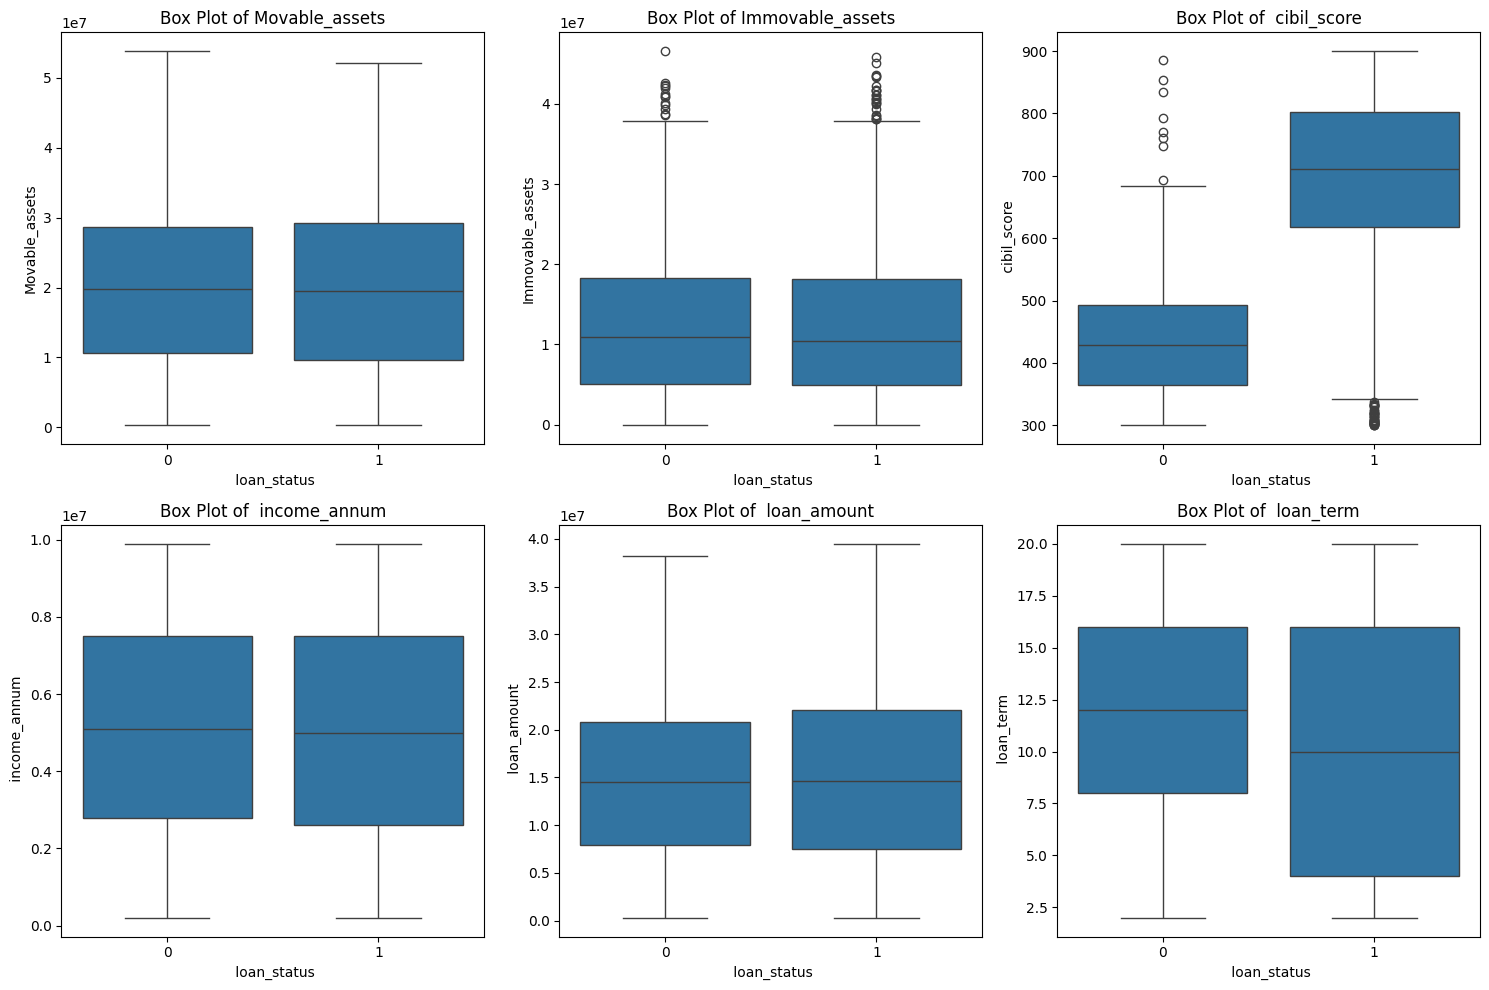

In [13]:
columns_for_boxplots = ['Movable_assets', 'Immovable_assets', ' cibil_score', ' income_annum', ' loan_amount', ' loan_term']

fig, axes = plt.subplots(2, 3, figsize=(15, 10))

for i, column in enumerate(columns_for_boxplots):
    row = i // 3
    col = i % 3
    sns.boxplot(x=' loan_status', y=column, data=df, ax=axes[row, col])
    axes[row, col].set_title(f'Box Plot of {column}')

plt.tight_layout()
plt.show()

# Relation of features with target variable

These boxplots give important relations of data:<br>


*   No direct relation of movable asstes with acceptance of loan request
*   No direct relation of immovable assets with loan status
*   Cibil scores are high for accepted loan requests <br>
*  No direct relation of income with loan status
*  No direct relation of loan amount with loan status
*  No direct relation of loan term with loan status but all the accepted loans have a low mean





Lets have a look at the cibil score ranges and their meaning.


|Cibil Score|Meaning|
|---|---|
|300-549|Poor|
|550-649|Fair|
|650-749|Good|
|750-799|Very Good|
|800-900|Excellent|

Source: [godigit.com](https://www.godigit.com/finance/credit-score/ranges-of-credit-score)

### **Valuable outliers**

Outliers in the 3rd boxplot are valuable they indicate --:

    1.   Loan requests with low cibil score are also accepted
    2.   IT is not necessary requests with high cibil score are accepted

---




#### Education and Income

<Axes: xlabel=' education', ylabel=' income_annum'>

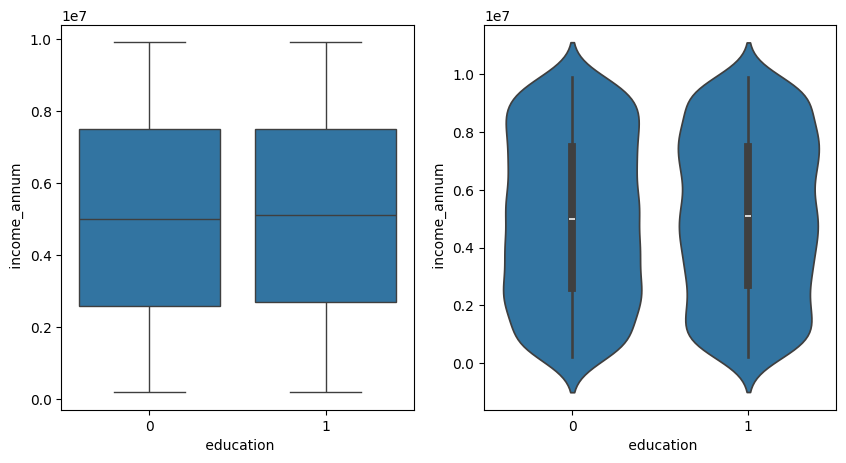

In [14]:
fig, ax = plt.subplots(1,2,figsize=(10, 5))
sns.boxplot(x = ' education', y = ' income_annum', data = df, ax=ax[0])
sns.violinplot(x = ' education', y = ' income_annum', data = df, ax=ax[1])

These two graphs - boxplot and violinplot visualizes the education of applicants along with their annual income. The boxplot shows some interesting fact that both the graduates and non-graduates have nearly same median income with very small increase in income of graduates. Moreover the violinplot shows the distribution of income among the graduates and non graduate applicants, where we can see that non graduate applicants have a even distribution between income 2000000 and 8000000, whereas there is a uneven distribution among the graduates with more applicants having income between 6000000 and 8000000. Since there is not much change in annual income of graduates and non graduates, I assume that education does not play a major role in the approval of loan.

## Distribution of features

<Axes: xlabel='Immovable_assets', ylabel='Count'>

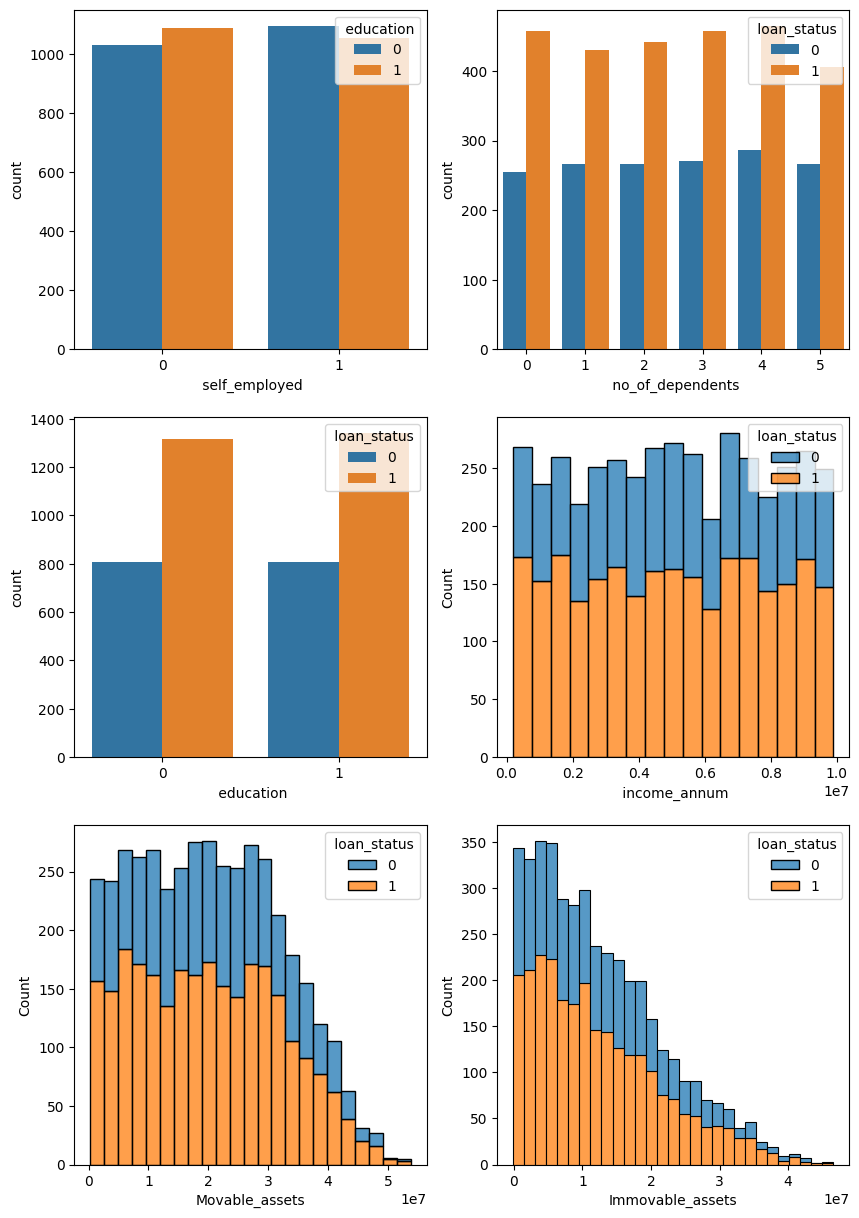

In [15]:
fig ,ax=plt.subplots(3,2,figsize=(10,15))
sns.countplot(x=' self_employed', data = df, hue = ' education' , ax=ax[0][0])
sns.countplot(x = ' no_of_dependents', data = df, hue = ' loan_status' , ax=ax[0][1])
sns.countplot(x = ' education', hue = ' loan_status', data = df , ax=ax[1][0])
sns.histplot(x =  ' income_annum', data = df, ax=ax[1][1], hue  = ' loan_status', multiple='stack')
sns.histplot(x  = 'Movable_assets', data = df, ax=ax[2][0], hue = ' loan_status', multiple='stack')
sns.histplot(x =  'Immovable_assets', data = df, ax=ax[2][1], hue  = ' loan_status', multiple='stack')

The Insights taken are:

*   Self employed feature does not decide chances of loan approval majorly
*   We assume no of dependents decrease the assets after equal division but it does not decide the loan approval chances as shown by countplot
*   Education does not decide loan status majorly
*   loan requests are uniformly distributed over annual incomes
*   Histogram shows there are more people with lower movable assets than 3 crore
*   Histogram shows there are more people with lower immovable assets than 2 crores



#### Loan Amount and Tenure

Text(0.5, 1.0, 'Loan Amount vs. Loan Term')

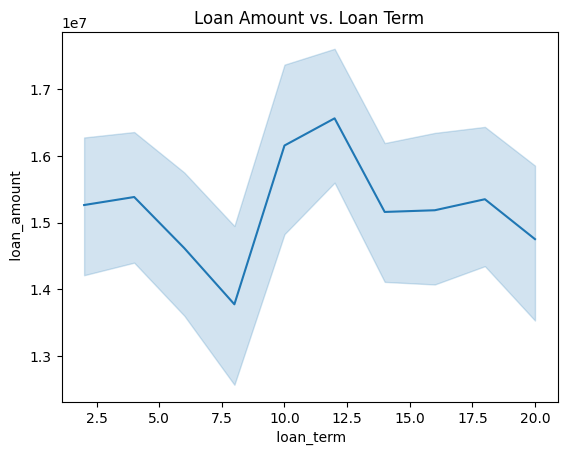

In [16]:
new_df1=df[df[' loan_status']==1] # The part of dataframe which shows only approved loan applications
sns.lineplot(x = ' loan_term', y = ' loan_amount', data = new_df1).set_title('Loan Amount vs. Loan Term')

This line plot shows the trend between the loan amount and the loan tenure. Between the loan tenure of 2.5 - 7.5 years the loan amount  is between 1400000 - 15500000. However the loan amount is significantly higher for the loan tenure of 10 years.

#### Annual Income vs Loan Status

<Axes: xlabel=' loan_status', ylabel=' income_annum'>

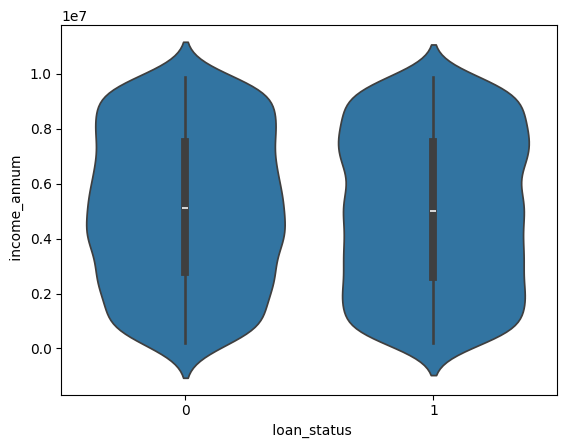

In [17]:
sns.violinplot(x=' loan_status', y=' income_annum', data=df)

On the whole, there has been no major difference between the annual incomes of the applicant with approved or rejected loan. But still, the approved loan applicants tend to have a higher annual income than the rejected loan applicants which is visible from the violin plot where the approved loan applicants have a higher density in the annual income near 8 miilion annual income.

## Coorelation Matrix Heatmap

<Axes: >

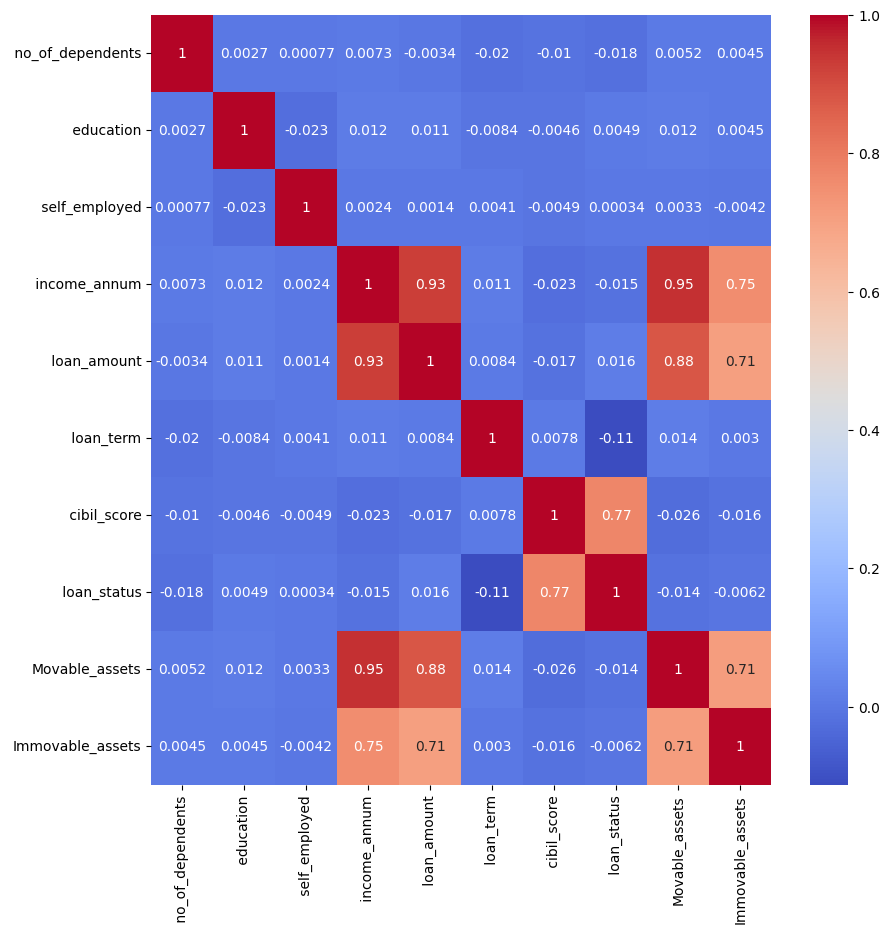

In [18]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot = True,cmap='coolwarm')

This coorelation matrix heatmap has the folowing strong correlations:
1. Movable Assets and Immovable Assets
2. Income and Movable Assets
3. Income and Immovable Assets
4. Movable Assets and Loan Amount
5. Immovable Assets and Loan Amount
6. Loan Status and Cibil Score
7. Loan Amount and Income

The coorelation between the movable and immovable assets is justified because both come under assets and its obvious that person with more movable assets will have more immovable assets and vice versa. Same is with Income and Movables and Immovale assets. The person with greater income will have greater assets.

Now, I will be exploring the coorleation between Assets and Loan Amount, and also between Income and Loan Amount. The relation between the loan status and cibil score is already explored in the previous section.

#### Assets Vs Loan Amount

<Axes: xlabel=' cibil_score', ylabel=' loan_amount'>

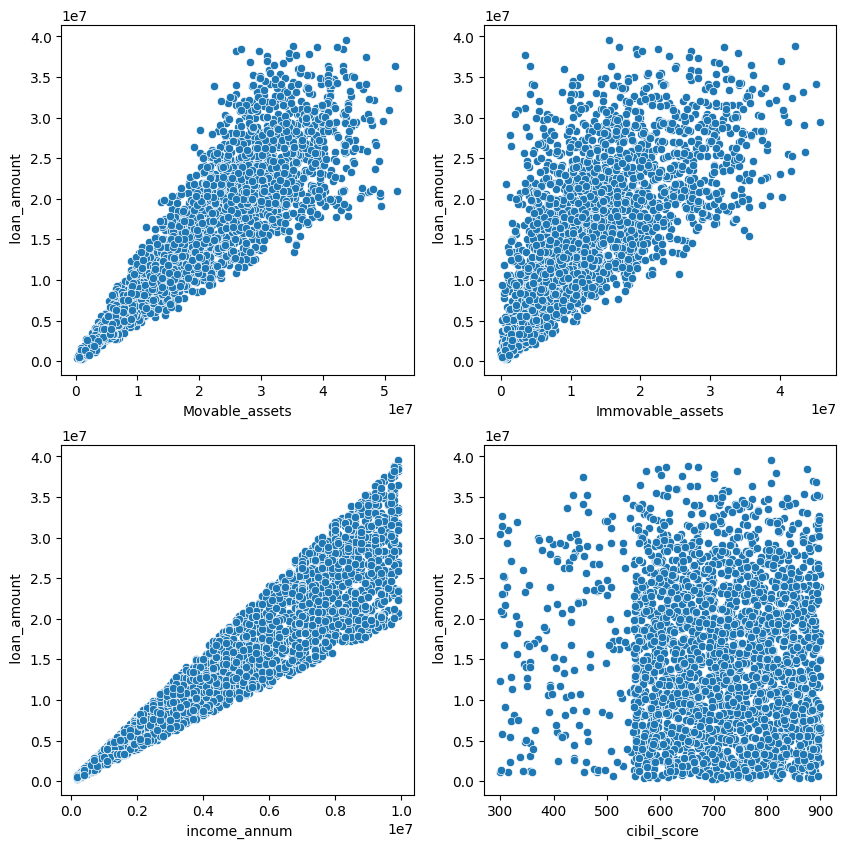

In [19]:
new_df1=df[df[' loan_status']==1] # The part of dataframe which shows only approved loan applications
fig, ax = plt.subplots(2,2,figsize=(10, 10))
sns.scatterplot(x='Movable_assets', y = ' loan_amount', data = new_df1, ax=ax[0][0])
sns.scatterplot(x='Immovable_assets', y = ' loan_amount', data = new_df1, ax=ax[0][1])

sns.scatterplot(x=' income_annum', y = ' loan_amount', data = new_df1, ax=ax[1][0])
sns.scatterplot(x=' cibil_score', y = ' loan_amount', data = new_df1, ax=ax[1][1])

The loan amount has positive relation with annual income, movable and immovable assets. The more the assets, the more the loan amount issued by the bank.

#### Loan Amount Vs Income

The loan amount and applicant's annual income have a very direct relation between them. The higher the income, the higher the loan amount. This is because the applicant's income is the main factor in deciding the how much loan needed.

## Train Test Split

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop(' loan_status', axis=1), df[' loan_status'], test_size=0.2, random_state=42)

## Model Building

I will be using the following machine learning models to predcit the loan approval status:
1. Decision Tree Classifier
2. Random Forest Classifier
3. Logistic Regression
### Regularization techniques


*   L1 (lasso)
*   L2 (Ridge)
*   Elastic net



##**Decision Tree Classifier**

In [21]:
from sklearn.tree import DecisionTreeClassifier
# Create decision tree object
dtree = DecisionTreeClassifier()

In [22]:
# Trainign the model using the training data
dtree.fit(X_train, y_train)

# Training Accuracy
dtree.score(X_train, y_train)

# Predicting the Loan Approval Status
dtree_pred = dtree.predict(X_test)

##**Random Forest Classifier**

In [23]:
from sklearn.ensemble import RandomForestClassifier

# Create a random forest classifier
rfc = RandomForestClassifier()

In [24]:
# Training the model using the training data
rfc.fit(X_train, y_train)

# Training Accuracy
rfc.score(X_train, y_train)

# Predicting the Loan Approval Status
rfc_pred = rfc.predict(X_test)

### **Logistic Regression**

In [25]:
from sklearn.linear_model import LogisticRegression

# Create and train model
logreg = LogisticRegression(max_iter=1000)  # Increased max_iter for convergence
logreg.fit(X_train, y_train)

logreg_pred = logreg.predict(X_test)

### Regularization Techniques

In [26]:
from sklearn.preprocessing import StandardScaler

# Standardize features (crucial for regularization)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# L1 Regularization (Lasso)
logreg_l1 = LogisticRegression(penalty='l1',
                             solver='liblinear',  # Required for L1
                             C=1.0,              # Inverse of regularization strength
                             random_state=42)
logreg_l1.fit(X_train_scaled, y_train)

# L2 Regularization (Ridge)
logreg_l2 = LogisticRegression(penalty='l2',
                             C=1.0,
                             random_state=42)
logreg_l2.fit(X_train_scaled, y_train)

# ElasticNet Regularization
logreg_en = LogisticRegression(penalty='elasticnet',
                             solver='saga',      # Required for ElasticNet
                             l1_ratio=0.5,       # Mix between L1/L2 (0.5 = equal)
                             C=1.0,
                             random_state=42)
logreg_en.fit(X_train_scaled, y_train)

#calculating log loss metric
from sklearn.metrics import log_loss

logreg_l1_pred = logreg_l1.predict(X_test_scaled)
logreg_l2_pred = logreg_l2.predict(X_test_scaled)
logreg_en_pred = logreg_en.predict(X_test_scaled)

models = {
    'L1 (Lasso)': logreg_l1,
    'L2 (Ridge)': logreg_l2,
    'ElasticNet': logreg_en
}

for name, model in models.items():
    y_proba = model.predict_proba(X_test_scaled)
    print(f"\n{name} Regularization:")
    print(f"Log Loss: {log_loss(y_test, y_proba):.4f}")


L1 (Lasso) Regularization:
Log Loss: 0.2268

L2 (Ridge) Regularization:
Log Loss: 0.2267

ElasticNet Regularization:
Log Loss: 0.2267


## Model Evalution

#### Confusion Matrix

Text(518.4494949494949, 0.5, 'Actual')

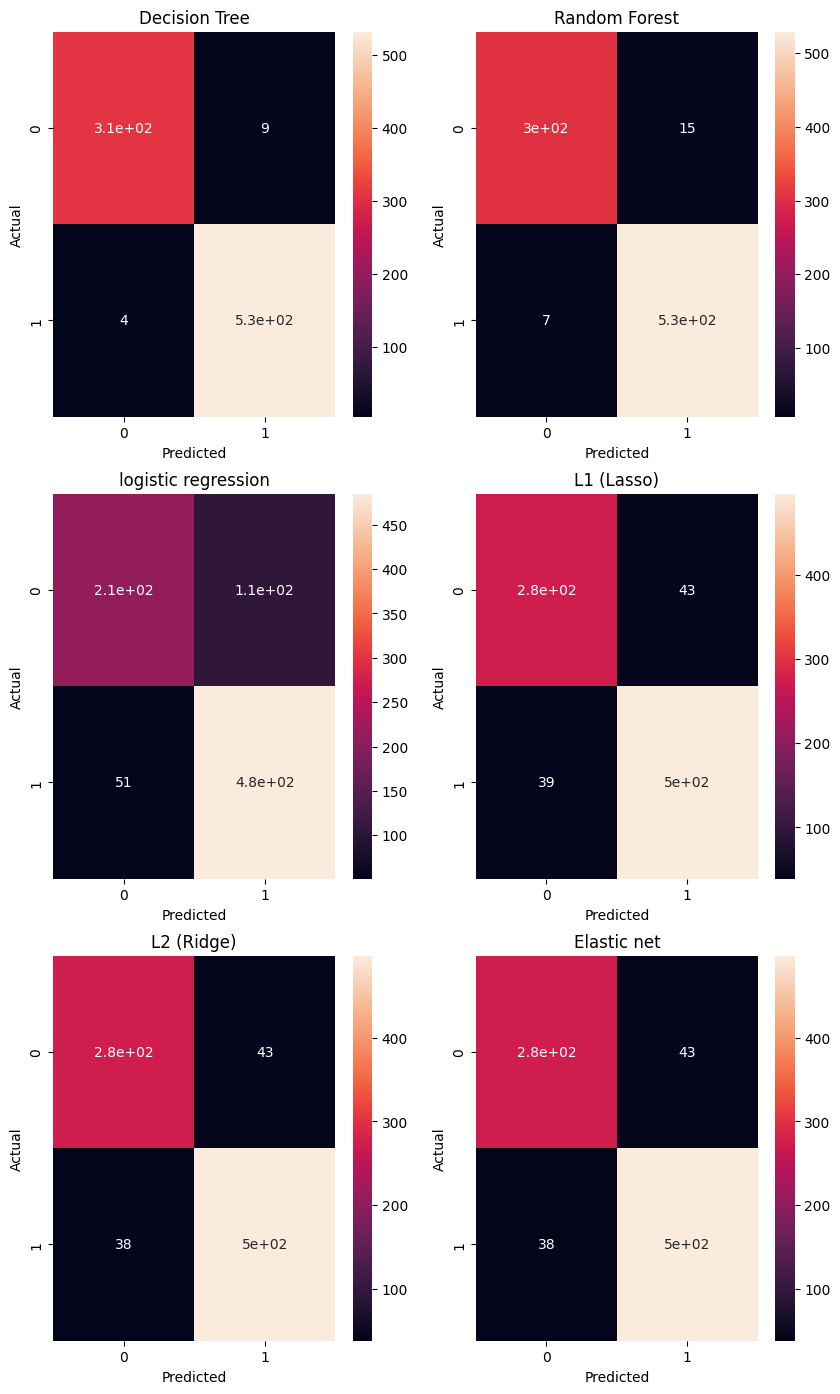

In [27]:
from sklearn.metrics import confusion_matrix

fig, ax = plt.subplots(3,2,figsize=(10,17))
sns.heatmap(confusion_matrix(y_test, dtree_pred), annot=True, ax=ax[0][0]).set_title('Decision Tree')
ax[0][0].set_xlabel('Predicted')
ax[0][0].set_ylabel('Actual')
sns.heatmap(confusion_matrix(y_test, rfc_pred), annot=True, ax=ax[0][1]).set_title('Random Forest')
ax[0][1].set_xlabel('Predicted')
ax[0][1].set_ylabel('Actual')
sns.heatmap(confusion_matrix(y_test, logreg_pred), annot=True, ax=ax[1][0]).set_title('logistic regression')
ax[1][0].set_xlabel('Predicted')
ax[1][0].set_ylabel('Actual')
sns.heatmap(confusion_matrix(y_test, logreg_l1_pred), annot=True, ax=ax[1][1]).set_title('L1 (Lasso)')
ax[1][1].set_xlabel('Predicted')
ax[1][1].set_ylabel('Actual')
sns.heatmap(confusion_matrix(y_test, logreg_l2_pred), annot=True, ax=ax[2][0]).set_title('L2 (Ridge)')
ax[2][0].set_xlabel('Predicted')
ax[2][0].set_ylabel('Actual')
sns.heatmap(confusion_matrix(y_test, logreg_en_pred), annot=True, ax=ax[2][1]).set_title('Elastic net')
ax[2][1].set_xlabel('Predicted')
ax[2][1].set_ylabel('Actual')

The above confusion matrix heatmap visualizes the the true positive and true negative value counts in both the machine learning models. The decision tree classfier has only 17 false positve and negative values where has random forest classifier has 19 false postive and negative values. <br><br>
Both decision tree classifier and random forest classifier give almost same results<br><br>
Logistic regression gives huge number of false negative values which is very less accuracy<br>
After regularization techniques accuracy is increased but not as good as decision tree classifier<br><br>
**Decision tree and random forest classifier are better fitted then logistic regression model for this dataset**


---



#### ROC-AUC Curve

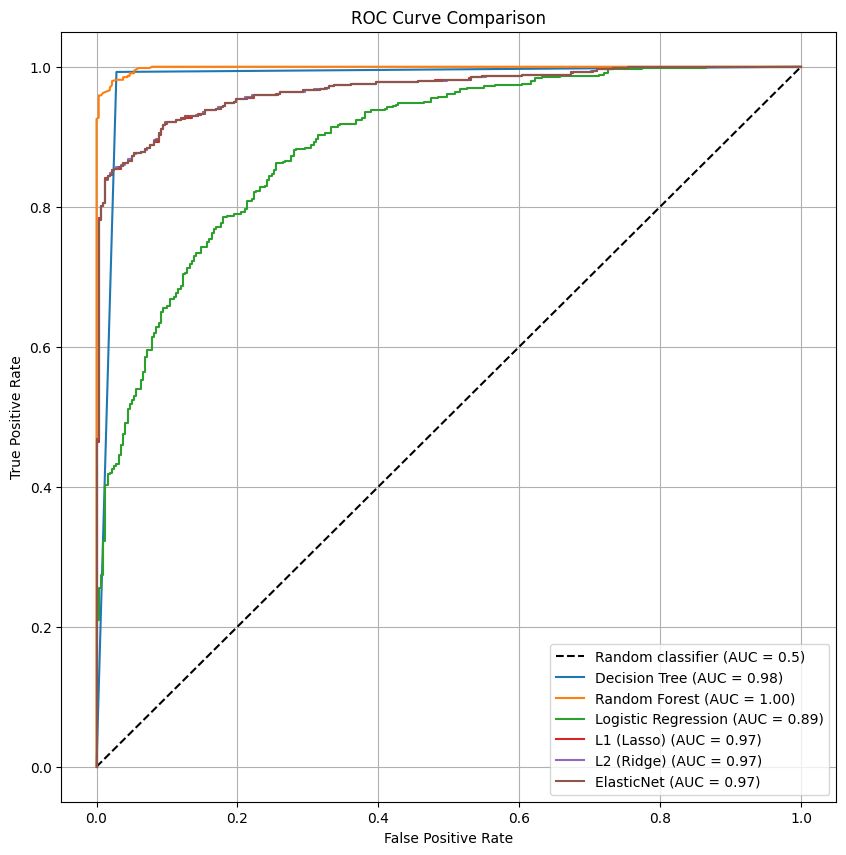

In [28]:
from sklearn.metrics import roc_curve, auc

def plot_roc_curves(models1, models2, X_test,X_test_scaled, y_test, model_names1, model_names2):
    plt.figure(figsize=(10, 10))

    # Plot diagonal line (random classifier)
    plt.plot([0, 1], [0, 1], 'k--', label='Random classifier (AUC = 0.5)')

    for model, name in zip(models1, model_names1):
        if hasattr(model, "predict_proba"):
            y_score = model.predict_proba(X_test)[:, 1]
        else:
            y_score = model.decision_function(X_test)

        fpr, tpr, _ = roc_curve(y_test, y_score)
        roc_auc = auc(fpr, tpr)

        plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

    for model, name in zip(models2, model_names2):
        if hasattr(model, "predict_proba"):
            y_score = model.predict_proba(X_test_scaled)[:, 1]
        else:
            y_score = model.decision_function(X_test_scaled)

        fpr, tpr, _ = roc_curve(y_test, y_score)
        roc_auc = auc(fpr, tpr)

        plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve Comparison')
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.show()

plot_roc_curves([dtree, rfc, logreg],[logreg_l1,logreg_l2,logreg_en], X_test,X_test_scaled, y_test,['Decision Tree', 'Random Forest', 'Logistic Regression'],['L1 (Lasso)','L2 (Ridge)','ElasticNet'])


The ROC curve shows:-
*   Random forest classifier gives best prediction followed by
*   Decision tree classifier is also approximately good model
*   Logistic regression with regularization are moderate models
*   logistic regression without regularization is giving poor predictions



#### Classification Report

In [29]:
from sklearn.metrics import classification_report

print(classification_report(y_test, dtree_pred))
print(classification_report(y_test, rfc_pred))
print(classification_report(y_test, logreg_pred))
print(classification_report(y_test, logreg_l1_pred))
print(classification_report(y_test, logreg_l2_pred))
print(classification_report(y_test, logreg_en_pred))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       318
           1       0.98      0.99      0.99       536

    accuracy                           0.98       854
   macro avg       0.99      0.98      0.98       854
weighted avg       0.98      0.98      0.98       854

              precision    recall  f1-score   support

           0       0.98      0.95      0.96       318
           1       0.97      0.99      0.98       536

    accuracy                           0.97       854
   macro avg       0.97      0.97      0.97       854
weighted avg       0.97      0.97      0.97       854

              precision    recall  f1-score   support

           0       0.81      0.67      0.73       318
           1       0.82      0.90      0.86       536

    accuracy                           0.82       854
   macro avg       0.81      0.79      0.80       854
weighted avg       0.82      0.82      0.81       854

              preci

In [30]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error,accuracy_score

# Decision Tree Classifier
print('R2 score: ', r2_score(y_test, dtree_pred))
print('Accuracy score: ', accuracy_score(y_test, dtree_pred))
print('Mean Squared Error: ', mean_squared_error(y_test, dtree_pred))
print('Mean Absolute Error: ', mean_absolute_error(y_test, dtree_pred))

print('\n')
# Random Forest Classifier
print('R2 score: ', r2_score(y_test, rfc_pred))
print('Accuracy score: ', accuracy_score(y_test, rfc_pred))
print('Mean Squared Error: ', mean_squared_error(y_test, rfc_pred))
print('Mean Absolute Error: ', mean_absolute_error(y_test, rfc_pred))

print('\n')
# logistic regression
print('R2 score: ', r2_score(y_test, logreg_pred))
print('Accuracy score: ', accuracy_score(y_test, logreg_pred))
print('Mean Squared Error: ', mean_squared_error(y_test, logreg_pred))
print('Mean Absolute Error: ', mean_absolute_error(y_test, logreg_pred))

print('\n')
# l1 (Lasso)
print('R2 score: ', r2_score(y_test, logreg_l1_pred))
print('Accuracy score: ', accuracy_score(y_test, logreg_l1_pred))
print('Mean Squared Error: ', mean_squared_error(y_test, logreg_l1_pred))
print('Mean Absolute Error: ', mean_absolute_error(y_test, logreg_l1_pred))

print('\n')
# l2 (ridge)
print('R2 score: ', r2_score(y_test, logreg_l2_pred))
print('Accuracy score: ', accuracy_score(y_test, logreg_l2_pred))
print('Mean Squared Error: ', mean_squared_error(y_test, logreg_l2_pred))
print('Mean Absolute Error: ', mean_absolute_error(y_test, logreg_l2_pred))

print('\n')
# elastic net
print('R2 score: ', r2_score(y_test, logreg_en_pred))
print('Accuracy score: ', accuracy_score(y_test, logreg_en_pred))
print('Mean Squared Error: ', mean_squared_error(y_test, logreg_en_pred))
print('Mean Absolute Error: ', mean_absolute_error(y_test, logreg_en_pred))

R2 score:  0.9348657655120624
Accuracy score:  0.9847775175644028
Mean Squared Error:  0.01522248243559719
Mean Absolute Error:  0.01522248243559719


R2 score:  0.88977283394349
Accuracy score:  0.9742388758782201
Mean Squared Error:  0.02576112412177986
Mean Absolute Error:  0.02576112412177986


R2 score:  0.21337886041490628
Accuracy score:  0.8161592505854801
Mean Squared Error:  0.18384074941451992
Mean Absolute Error:  0.18384074941451992


R2 score:  0.5891532901530083
Accuracy score:  0.9039812646370023
Mean Squared Error:  0.09601873536299765
Mean Absolute Error:  0.09601873536299765


R2 score:  0.5941636158828498
Accuracy score:  0.905152224824356
Mean Squared Error:  0.09484777517564402
Mean Absolute Error:  0.09484777517564402


R2 score:  0.5941636158828498
Accuracy score:  0.905152224824356
Mean Squared Error:  0.09484777517564402
Mean Absolute Error:  0.09484777517564402


From all the above metrics, graphs and reports, I conclude that random forest classifier is a better machine learning model to predict the loan approval status of a person.

## Conclusion
From the exploratory data analysis, we can conclude that the following factors are important for the approval of loan:
- CIBIL Score: People with higher CIBIL score have higher chances of loan approval
- Number of Dependents: People with more number of dependents have less chances of loan approval
- Assets: People with more assets ( including movable and immovable) have higher chances of loan approval
- Loan Amount and Tenure: People with higher loan amount and lower tenure have more chances of loan approval

Coming to the machine learning models, I have used Decision Tree Classifier, Random Forest Classifier and Logistic Regression. Both the models have given excellent results having accuracies - 91.4 % and 89.4 % but  logistic regression has given poor results.<br> But the random forest classifier has given better results.